# 제1회 KRX 금융 빅데이터 활용 아이디어 경진대회

## 주제 : AI 댓글 감성분석 점수를 활용한 국내 주식시장 심리지수

- __chapter 1. 정형데이터__
    - 거래회전율 지수
    - 배당 프리미엄
    - 환율 지수
    - 세 지표를 합친 정형 데이터 지표 __<= 넣을지 말지 논의__
- __chapter 2. 비정형 데이터__
    - 비정형 데이터 크롤링
        - 유튜브댓글 api
        - 네이버금융 종목토론방 댓글 크롤링
    - 비정형 데이터 전처리
        - 댓글 전처리
        - 댓글 토크나이징
        - 댓글 레이블링
        - 학습데이터 생성 (댓글 도미넌스 기반 랜덤추출)
        - 날짜별 데이터 정리
    
- __chapter 3. BERT 모델링__
    - 모델 학습
    - 모델 예측

- __chapter 4. 시각화 및 서비스__

---

## Abstract
<span style="font-size:110%">기존의 경제학 및 자본시장에서는 합리적인 개인들이 주어진 정보를 모두 활용하여 이성적인 판단에 근거하여 행동한다고 전제하였습니다. 그렇지만 현실의 경제 및 자본시장에서는 개인들의 __비이성적인 행동 양상__을 보이는 경우가 많았고, 1990년대 이후로 이러한 비이성적인 행동을 설명하기 위해 행동 경제학(Behavioral Economics)이 주류로 등장하기 시작했습니다. 특히 행동 경제학파들은 자본 시장에서의 비이성적인 행동들이 존재하며, 자본 시장 참여자들의 잡음(noise) 혹은 감정(sentiment)이 수익률에 영향을 미친다는 것을 근거로 효율적 시장 가설이 완벽하지 않다고 주장했습니다.(Brown, 1999; Shleifer and Summers, 1990) 또한, 자본 시장의 비이성적인 행동은 한국 자본 시장에서도 비슷한 양상을 보인다는 것으로 나타났습니다.(Kim and Park, 2015)</span> 

<span style="font-size:110%">저희 팀은 이러한 행동 경제학의 주장을 근거로 시장의 비이성적인 행동을 포착할 수 있는 방법을 고안하고자 합니다. 과거의 비이성적인 행동을 포착하기 위한 방법으로는 시카고옵션거래소 변동성지수(Chicago Board Options Exchange Volatility Index; VIX Index) 등을 사용하는 것이 대표적이었습니다. 하지만 최근 딥러닝 기법의 발전으로 문서를 분석하여 작성자의 감성을 분석하는 __감성 분석(sentiment analysis)__ 기법의 정확도가 크게 향상하였습니다. 이에 따라 VIX 지수 등의 시장의 참여 결과 데이터를 통해 참여자의 비이성적 행동을 포착하는 간접적인 방법이 아닌 댓글, SNS, 뉴스 등 시장 참여자와 관련된 문서를 감정 분석하여 감정에 따른 비이성적인 행동을 포착하려는 시도가 있었습니다(Li et al, 2021; 김명진 외 3, 2020; 홍성혁, 2020). 이러한 시도를 근거로 저희 팀은 다양한 문서 중에서 기존 연구에서 사용된 데이터이며, 특히 개인 투자자들의 감정을 파악하기에 용이한 __KTOP30 종목의 네이버의 종목 토론방__의 문서와 기존 연구에서 사용되지는 않았지만 최근 전문적인 정보를 쉽게 얻을 수 있어 많이 사용되고 있는 경로인 __유튜브(삼프로TV)의 댓글__을 감정 분석을 위한 데이터셋으로 선정하였습니다.</span> 

<span style="font-size:110%">또한, CNN의 Fear and Greed Index와 alternative사의 Crypto Fear and Greed Index를 벤치마킹하여 저희 팀만의 공포탐욕 지수를 구성하고자 하였습니다. CNN의 공포탐욕 지수에서는 7가지의 지표(Market Momentum, Stock Price Breadth, Put and Call Options, Market Volatility, Safe Haven Demand, Junk Bond Demand)로 구성되어 있으며, 가상화폐의 공포탐욕 지수는 5가지 지표(Volatility, Market Momentum/Volume, Social Medai, Dominance, Trends)로 구성되어 있습니다. CNN의 경우에는 모두 기존의 주식 시장에서 보조 지표로 활용되는 것들과 채권시장의 수익률 등으로 지수가 구성되어 있으며, 가상화페의 경우 기존의 변동성과 모멘텀 등의 보조 지표를 차용함과 동시에 SNS나 구글 트렌드의 검색량 통계를 지수에 포함시킴으로써 기존의 보조지표와는 다른 지표를 포함시킨 것이 특징이라 할 수 있습니다.</span> 
    
<span style="font-size:110%">저희 팀은 위의 다양한 지표를 참고함과 동시에 이론적인 근거를 기반으로 지수를 구성하였습니다. Baker와 Wurgler(2007)가 제안한 투자 심리지수에 포함되어 있는 __거래회전율__을 KTOP30 종목을 기준으로 일일 거래회전율(거래량 / 상장 주식 수)로 변형하여 지수에 포함시켰습니다. 그리고 Baker와 Wurgler(2007)는 배당을 주는 기업과 주지 않는 기업들의 평균 BPS의 차이를 __배당 프리미엄(Dividen Premium)__이라 정의하고 이를 투자 심리지수에 포함시켰습니다. 이에 저희도 유가증권 기업과 코스닥 기업들로 구성된 배당 프리미엄을 저희 지수에 포함시켰습니다. 또한, 거시적인 대외 환경을 고려할 수 있는 __환율__ 데이터를 포함하였으며, 마지막으로 KTOP30 종목의 종목 토론방 데이터와 유튜브 댓글 데이터를 감성 분석한 후, __1과 0사이로 점수화하여 1에 가까울수록 탐욕에, 0에 가까울수록 공포에 가까운 감성을 나타내도록 라벨링__하였습니다. 훈련 타겟기간은 과열과 침체 양상을 보이는 2020년 6월 1일부터 2022년 6월 30일까지입니다.</span> 

<span style="font-size:110%">저희 팀이 만든 공포 탐욕 지수를 통해 기존의 참여자들의 심리를 숫자 데이터를 통해 간접적으로 파악하던 방식에서 참여자들의 심리를 댓글 등의 문서를 통해 파악하여 좀더 명확한 __참여자들의 심리를 파악__할 수 있습니다. 또한, 개인의 심리뿐만 아니라 __시장 요인(거래회전율), 재무 요인(배당 프리미엄), 거시 요인(환율)__을 반영하여 좀더 정확한 심리 지수를 만들고자 하였습니다. 이를 통해 __주식 시장의 과열과 침체__를 유추해봄으로써 다양한 참여자의 의사결정에 큰 도움이 될 것으로 기대됩니다.</span> 

---

## chapter 1. 정형 데이터

### 1.1 거래 회전율(시장 요인)
보통의 거래회전율은 연간으로 계산하므로 1년의 입회일수(약 250일)를 곱해주는 (일일 거래량 * 입회일수) / 상장 주식 수의 평균 의 공식으로 계산하는데, 저희 팀은 다른 데이터와의 연결성을 위해   
__$$일일 거래회전율 = \frac{(\frac{일일거래량총합}{주식종목수})} {(\frac{상장주식수}{주식종목수})}$$__
로 계산하였습니다. 또한, KOSPI 거래회전율이 아닌
__$$KTOP30 거래회전율 = \frac{\log{(\frac{일일거래량총합}{30})}} {\log{(\frac{상장주식수}{30})}}$$__
으로 공식을 변형하여 계산하였습니다. 각 값의 크기가 매우 크기 때문에 로그스케일링을 취해줬습니다. 저희의 기준으로 __1에 가까울수록 탐욕(greed), 0에 가까울수록 공포(fear)__ 로 설정하였습니다.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# KTOP30 종목의 종목코드
codes = ['005930', '035420', '006400', '051910', '035720', '000100', '017670', '005490', '012330',
 '096770', '000810', '011170', '005380', '068270', '009150', '090430', '028260', '139480', '035760',
 '000660', '009540', '066570', '000270', '251270', '032830', '105560', '000720', '055550', '034220', '006800']

> 편의성과 시간 효율성을 위해 미리 위의 코드에 해당하는 거래량과 상장 주식수를 csv파일로 정리해두었습니다.

In [165]:
# start_date = "20200601"
# end_date = "20220815"
df_v = pd.read_csv('거래회전율.csv').drop('Unnamed: 0', axis = 1).set_index('날짜')
df_v

,거래량,상장주식수
날짜,,
2020-06-01,52101756,11262284117
2020-06-02,55702080,11262284117
2020-06-03,120676283,11262284117
2020-06-04,98610055,11262284117
2020-06-05,62517160,11262284117
...,...,...
2022-08-08,29224648,11753906357
2022-08-09,34521225,11753906357
2022-08-10,37498158,11753906357


In [166]:
df_v['거래량'] = np.log(df_v['거래량'])
df_v['상장주식수'] = np.log(df_v['상장주식수'] / 30)
df_v['거래회전율'] = round(df_v['거래량'] / df_v['상장주식수'].values, 5)
df_v['거래회전율_minmax'] = (df_v['거래회전율'] - min(df_v['거래회전율'])) / (max(df_v['거래회전율']) - min(df_v['거래회전율']))
df_v

,거래량,상장주식수,거래회전율,거래회전율_minmax
날짜,,,,
2020-06-01,17.768709,19.743528,0.89998,0.430955
2020-06-02,17.835528,19.743528,0.90336,0.457687
2020-06-03,18.608622,19.743528,0.94252,0.767400
2020-06-04,18.406684,19.743528,0.93229,0.686492
2020-06-05,17.950952,19.743528,0.90921,0.503954
...,...,...,...,...
2022-08-08,17.190523,19.786254,0.86881,0.184435
2022-08-09,17.357085,19.786254,0.87723,0.251028
2022-08-10,17.439802,19.786254,0.88141,0.284087


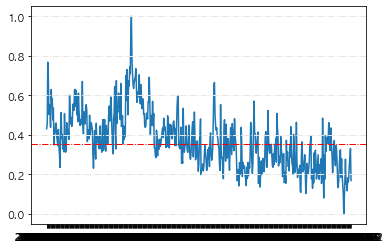

In [187]:
# 2020-06-01 ~ 2022-08-15
# 빨간색 선은 중앙값을 의미합니다
plt.plot(df_v['거래회전율_minmax'])
for i in range(0, 11, 2):
    plt.axhline(i*0.1, color='#E6E6E6', linestyle='-.', linewidth=1)
plt.axhline(df_v['거래회전율_minmax'].median(), color='red', linestyle='-.', linewidth=1)

### 1.2 배당 프리미엄(재무 요인)
Baker와 Wurgler(2007)는 배당을 주는 기업과 배당을 주지 않는 기업간의 차이, 즉 배당을 주는 것에 대한 프리미엄이 시장 참여자의 심리적인 요인에 영향을 미친다고 말합니다. 특히, 배당을 주는 기업과 배당을 주지 않는 기업간의 BPS 차이를 계산함으로써 배당을 주지 않는 기업의 BPS가 올라갈수록 재무적으로 건전하지 않거나 성장주에 투자하는 경향을 반영하였습니다. 따라서, 저희는 유가증권과 코스닥 기업들의 배당 프리미엄을 지표에 포함시키고 다른 데이터와의 연결성을 위해<br/><br/> 
__$$배당프리미엄 = ((배당을 주지 않는 기업의 평균 BPS_{유가증권+코스닥}) - (배당을 주는 기업의 평균 BPS_{유가증권+코스닥}))_{minmax}$$__<br/> 
으로 설정하고 6년간의 역사적 최소치와 최대치로 min-max-scaling을 해주었습니다. 
> 편의성과 시간 효율성을 위해 미리 csv파일로 정리하였습니다

In [194]:
# 6년간의 유가증권 + 코스닥 배당 프리미엄
df1 = pd.read_csv('배당_유가증권+코스닥_201701_202006.csv').set_index('날짜')
df_pm = pd.read_csv('배당_유가증권+코스닥_2020_06_2022_08.csv').set_index('날짜')
df_pm

,PBR
날짜,
2020-06-01,0.992232
2020-06-02,1.009572
2020-06-03,0.995083
2020-06-04,1.000840
2020-06-05,1.021526
...,...
2022-08-08,4.270521
2022-08-09,4.263770
2022-08-10,4.231009


<AxesSubplot:xlabel='날짜'>

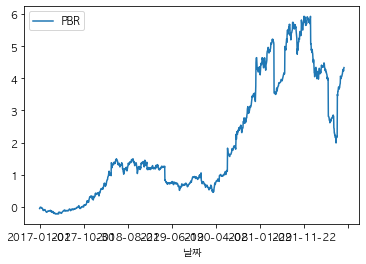

In [195]:
pd.concat([df1,df_pm]).plot()

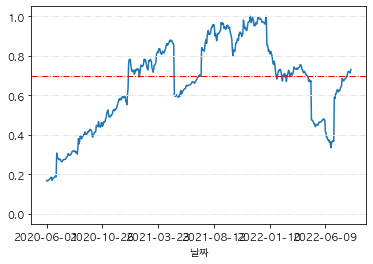

In [196]:
# min값 : -0.2
# 2020-06-01 ~ 2022-08-15
# 빨간색 선은 중앙값을 의미합니다
df_pm['PBR_pm'] = (df_pm['PBR']) / (max(df_pm['PBR']))
df_pm = df_pm.drop('PBR', axis=1)
df_pm['PBR_pm'].plot()
for i in range(0, 11, 2):
    plt.axhline(i*0.1, color='#E6E6E6', linestyle='-.', linewidth=1)
plt.axhline(df_pm['PBR_pm'].median(), color='red', linestyle='-.', linewidth=1)

### 1.3 환율(거시 요인)
 대외 충격에 민감한 우리나라의 특성을 반영해주기 위해 원/달러 환율 데이터를 지수에 포함시켰습니다. 환율 데이터를 통해 거시적인 경제 환경을 반영할 수 있으며, 단기적인 외국 자본의 진입 및 이탈을 반영할 수 있을 것으로 기대됩니다. 이러한 환율 데이터는 과거의 경험을 바탕으로 __max값을 1500, min값을 900으로 min-max-scaling__해줬으며, 자본이 이탈하는 상황이 주식 시장에 있어서는 부정적인 상황이기 때문에 환율이 상승하는 상황을 공포(fear)로 나타내주기 위해<br/> <br/> 
__$$환율지표 = 1 - (환율_{minmax})$$__<br/> 
을 해줘 위아래가 뒤집힌 환율 데이터를 지수에 반영하였습니다. 1에 가까울수록 탐욕(greed), 0에 가까울수록 공포(fear)를 나타냅니다.

<AxesSubplot:>

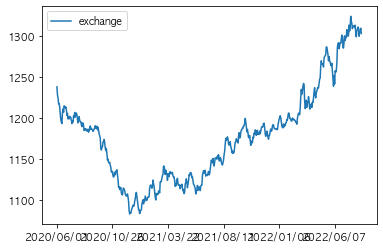

In [190]:
df_ex = pd.read_csv('exchange.csv', thousands = ',').transpose().drop(labels = ['통계표', '계정항목', '단위', '변환']).astype(float)
df_ex = df_ex.rename(columns={0:'exchange'})
df_ex.plot() # 원래 환율 데이터

In [191]:
df_ex['exchange'] = (df_ex['exchange'] - 900) / (1500 - 900)
df_ex['exchange'] = 1 - df_ex['exchange']
df_ex

,exchange
2020/06/01,0.437333
2020/06/02,0.453667
2020/06/03,0.459833
2020/06/04,0.471833
2020/06/05,0.471000
...,...
2022/08/08,0.334500
2022/08/09,0.325333
2022/08/10,0.324833
2022/08/11,0.318167


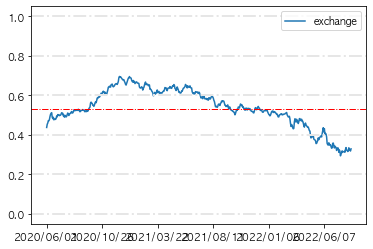

In [192]:
# 2020-06-01 ~ 2022-08-15
# 빨간색 선은 중앙값을 의미합니다
df_ex.plot()
for i in range(0, 11, 2):
    plt.axhline(i*0.1, color='#E6E6E6', linestyle='-.', linewidth=2)
plt.axhline(df_ex['exchange'].median(), color='red', linestyle='-.', linewidth=1)

### 1.4 세 지표를 합친 정형 데이터 지표

In [174]:
df_pm = df_pm.reset_index()
df_pm['날짜'] = pd.to_datetime(df_pm['날짜'])
df_ex = df_ex.reset_index()
df_ex['index'] = pd.to_datetime(df_ex['index'])
df_ex = df_ex.rename(columns={'index':'날짜'})
df = pd.merge(df_pm, df_ex)
df['거래회전율'] = df_v['거래회전율_minmax'].values
df

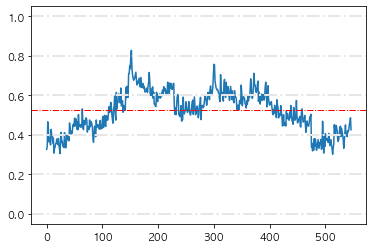

In [200]:
# 2020-06-01 ~ 2022-08-15
# 빨간색 선은 중앙값을 의미합니다
((df['PBR_pm'] * 0.4 + df['exchange'] * 0.2 + df['거래회전율'] * 0.4)).plot()
for i in range(0, 11, 2):
    plt.axhline(i*0.1, color='#E6E6E6', linestyle='-.', linewidth=2)
plt.axhline(((df['PBR_pm'] * 0.4 + df['exchange'] * 0.2 + df['거래회전율'] * 0.4)).median(), color='red', linestyle='-.', linewidth=1)

## chapter 2. 비정형 데이터

### 2.1 비정형 데이터 크롤링

#### 2.1.1 유튜브댓글 api

- 유튜브 채널 '삼프로tv'에서 2020년 06월부터 2022년 06월 사이에 업로드된 영상의 댓글을 크롤링하였습니다.
- '영상 제목', '영상 업로드 날짜', '영상 아이디', '댓글 내용', '댓글 작성자', '댓글 작성 날짜', '좋아요 수'에 대한 정보를 가져왔습니다.
- 국내 시장에 대한 반응을 확인하기 위해 해외 시장에 관련된 영상이나 경제와 관련없는 영상에 달린 댓글들은 제외하였습니다.
- 주말 혹은 공휴일의 경우에 주식 시장이 개장하지는 않지만 주말 혹은 공휴일의 심리가 영업 개시일의 주가에 영향을 미칠 수 있기 때문에 영업일이 아니더라도 포함시켰습니다.

In [ ]:
import pandas as pd
import datetime
import scrapetube
from googleapiclient.discovery import build

import warnings
warnings.filterwarnings('ignore')

In [ ]:
api_key = 'api_key'
youtube = build('youtube', 'v3', developerKey=api_key)

search_response = youtube.search().list(
    q = '삼프로tv',
    order = 'relevance',
    part = 'snippet',
    maxResults = 10,
    ).execute()

channel_id = search_response['items'][0]['snippet']['channelId']

videos = scrapetube.get_channel(channel_id)

video_ids = []

for video in videos:
    video_ids.append(video['videoId'])

for i in range(800):
    start = i * 50
    end = (i + 1) * 50
    video_request = youtube.videos().list(
        part="snippet",
        id=','.join(video_ids[start:end]))
    
    video_response = video_request.execute()
    
    for item in video_response['items']:
        title = item['snippet']['title']
        if ('글로벌 이슈체크' in title) or ('글로벌 마켓브리핑' in title) or ('직장인 vlog' in title):
            continue
        video_infos.append([item['snippet']['title'], item['snippet']['publishedAt'], item['id']])

df = pd.DataFrame(video_infos, columns=['title', 'video_date', 'id'])

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df.set_index('date')

df_22 = df[(pd.DatetimeIndex(df.index).year == 2022) & (pd.DatetimeIndex(df.index).month <= 6)]
df_21 = df[(pd.DatetimeIndex(df.index).year == 2021)]
df_20 = df[(pd.DatetimeIndex(df.index).year == 2020) & (pd.DatetimeIndex(df.index).month >= 6)]

comments_22 = []

for video_id in df_22['id']:
    api_obj = build('youtube', 'v3', developerKey=api_key)
    response = api_obj.commentThreads().list(part='snippet', videoId=video_id, maxResults=100).execute()

    while response:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments_22.append([video_id, comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])

        if 'nextPageToken' in response:
            response = api_obj.commentThreads().list(part='snippet', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
        else:
            break

df1 = pd.DataFrame(comments_22, columns=['id', 'comment', 'author', 'comment_date', 'num_likes'])

comments_21 = []

for video_id in df_21['id']:
    api_obj = build('youtube', 'v3', developerKey=api_key)
    response = api_obj.commentThreads().list(part='snippet', videoId=video_id, maxResults=100).execute()

    while response:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments_21.append([video_id, comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])

        if 'nextPageToken' in response:
            response = api_obj.commentThreads().list(part='snippet', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
        else:
            break

df2 = pd.DataFrame(comments_21, columns=['id', 'comment', 'author', 'comment_date', 'num_likes'])

comments_20 = []

for video_id in df_21['id']:
    api_obj = build('youtube', 'v3', developerKey=api_key)
    response = api_obj.commentThreads().list(part='snippet', videoId=video_id, maxResults=100).execute()

    while response:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments_20.append([video_id, comment['textDisplay'], comment['authorDisplayName'], comment['publishedAt'], comment['likeCount']])

        if 'nextPageToken' in response:
            response = api_obj.commentThreads().list(part='snippet', videoId=video_id, pageToken=response['nextPageToken'], maxResults=100).execute()
        else:
            break

df3 = pd.DataFrame(comments_20, columns=['id', 'comment', 'author', 'comment_date', 'num_likes'])

df_22 = df_22.reset_index()
df_21 = df_21.reset_index()
df_20 = df_20.reset_index()

sampro_22 = pd.merge(df_22, df1, on='id', how='outer')
sampro_21 = pd.merge(df_21, df2, on='id', how='outer')
sampro_20 = pd.merge(df_20, df3, on='id', how='outer')

def make_date_diff(df):
    df['date_diff'] = 0

    for idx in df.index:
        v = df.loc[idx, 'video_date']
        c = df.loc[idx, 'comment_date']
        diff = c - v
        df.loc[idx, 'date_diff'] = diff

make_date_diff(sampro_22)
make_date_diff(sampro_21)
make_date_diff(sampro_20)

def make_market_hour(df):
    df['market_hour'] = False
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

    for idx in df.index:
        h = df.iloc[idx, 5].hour
        m = df.iloc[idx, 5].minute
        w = days[df.iloc[idx, 5].weekday()]
    
    if w != '토요일' and w != '일요일':
        if (datetime.time(h, m) > datetime.time(9, 0)) and (datetime.time(h, m) < datetime.time(15, 30)):
            df.loc[idx, 'market_hour'] = True

make_market_hour(sampro_22)
make_market_hour(sampro_21)
make_market_hour(sampro_20)

sampro_22.to_csv('./sampro/sampro_22.csv', index=False)
sampro_21.to_csv('./sampro/sampro_21.csv', index=False)
sampro_20.to_csv('./sampro/sampro_20.csv', index=False)

sampro_2year = pd.concat([sampro_22, sampro_21, sampro_20])
sampro_2year.head()

In [ ]:
sampro_2year.head()

,video_date,video_title,id,comment,author,comment_date,num_likes,date_diff,market_hour
0,2022-06-30 14:12:05+00:00,"중국과 LCD 치킨게임 ""버려야 산다""/제약·바이오 전환점 다가왔나?/누리호 보유국...",iHXeZ5v15dk,안녕하세요! 삼프로TV입니다.\r<br>여러분의 응원과 사랑으로 삼프로TV가 구독자...,삼프로TV_경제의신과함께,2022-06-30 13:54:12+00:00,0,-1 days +23:42:07,True
1,2022-06-30 14:12:05+00:00,"중국과 LCD 치킨게임 ""버려야 산다""/제약·바이오 전환점 다가왔나?/누리호 보유국...",iHXeZ5v15dk,탁프로님 분석 명확하고 구체적이라서 도움 많이 받습니다,상상해보자,2022-07-07 02:52:59+00:00,0,6 days 12:40:54,False
2,2022-06-30 14:12:05+00:00,"중국과 LCD 치킨게임 ""버려야 산다""/제약·바이오 전환점 다가왔나?/누리호 보유국...",iHXeZ5v15dk,김탁님 분석 최고.,자전거55,2022-07-04 08:00:00+00:00,0,3 days 17:47:55,False
3,2022-06-30 14:12:05+00:00,"중국과 LCD 치킨게임 ""버려야 산다""/제약·바이오 전환점 다가왔나?/누리호 보유국...",iHXeZ5v15dk,산업구조가 일본에서 한국 그 다음 중국 쪽으로 흘러가는 것. 한국이 살 길은 기술...,꿈이야!,2022-06-30 23:18:01+00:00,0,0 days 09:05:56,False
4,2022-06-30 14:12:05+00:00,"중국과 LCD 치킨게임 ""버려야 산다""/제약·바이오 전환점 다가왔나?/누리호 보유국...",iHXeZ5v15dk,"누리호 얘기를 듣는데, 사회자분들의 코멘트가 너무 방해된다는 생각이 들정도로 매끄럽...",롱타이,2022-06-30 22:33:27+00:00,1,0 days 08:21:22,False


#### 2.1.2 종목토론실 댓글 크롤링
- 종목토론실 댓글에서 '날짜', '댓글제목', '조회수', '좋아요', 싫어요' 를 크롤링 했습니다.
- 기업대상은 KTOP30의 기업입니다.

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import datetime as dt


import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_code(symbol):
    krx = pd.read_csv('./krx_code.csv',encoding='utf-8')
    krx = krx.set_index('한글 종목약명')
    try:
        code = krx.at[symbol,'단축코드']
        return code
    except:
        print('종목명을 다시 확인해주세요.')
        return 0

def get_comment_csv(symbol,page,year,month,day):   
    code = get_code(symbol)
    date_list = [] # 날짜
    comment_list = [] # 댓글
    view_list = [] # 조회수
    good_list = [] # 좋아요
    bad_list = [] # 싫어요
    flag = 0
    for i in range(1,page+1):
        url = f'https://finance.naver.com/item/board.naver?code={code}&page={i}'
        headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36 Edg/100.0.1185.50'}
        res = requests.get(url, headers = headers)
        bs = BeautifulSoup(res.text, 'html.parser')
        for j in range(20):
            try:
                root = bs.find('div',{'class':'section inner_sub'}).find_all('tr',{'onmouseover':'mouseOver(this)'})[j].text.split('\n')
                
                date_list.append(root[1].replace('.','-'))
                
                if len(root) == 14: # 답글
                    comment_list.append('답글:'+root[4])
                    view_list.append(root[10])
                    good_list.append(root[11])
                    bad_list.append(root[12])          
                elif len(root) == 13: # 기본
                    comment_list.append(root[3])
                    view_list.append(root[9])
                    good_list.append(root[10])
                    bad_list.append(root[11])
                else: # 에러
                    comment_list.append('error')
                    view_list.append(0)
                    good_list.append(0)
                    bad_list.append(0)   
            except:
                break

            tp = [int(j) for j in root[1].split()[0].split('.')]
            if dt.datetime(tp[0],tp[1],tp[2]) < dt.datetime(year,month,day):
                flag = 1
                break
        if flag == 1:
            break
        print(f'\r{i}페이지 크롤링 완료.',end='')
        
        
    df = pd.DataFrame()
    df['날짜'] = date_list
    df['댓글'] = comment_list
    df['조회수'] = view_list
    df['좋아요'] = good_list
    df['싫어요'] = bad_list
    return df

- KTOP30 리스트 입니다.

In [4]:
pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2).drop(0,axis=0)

,번호,종목명,ISIN,종목코드,수량,비중(%),평가금액(원),현재가(원),등락(원)
1,2,삼성전자,KR7005930003,005930,6110,0.219734,351325000,60000,2500
2,3,NAVER,KR7035420009,035420,611,0.089231,142668500,231000,-2500
3,4,삼성SDI,KR7006400006,006400,244,0.082561,132004000,548000,7000
4,5,LG화학,KR7051910008,051910,244,0.080882,129320000,512000,-18000
5,6,카카오,KR7035720002,035720,1222,0.055105,88106200,70100,-2000
6,7,유한양행,KR7000100008,000100,1222,0.043947,70265000,57300,-200
7,8,SK텔레콤,KR7017670001,017670,1222,0.041960,67087800,53500,-1400
8,9,POSCO홀딩스,KR7005490008,005490,244,0.034032,54412000,224000,1000
9,10,현대모비스,KR7012330007,012330,244,0.032277,51606000,211500,0
10,11,삼성화재,KR7000810002,000810,244,0.030064,48068000,195500,-1500


In [6]:
ktop30_company = pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2).drop(0,axis=0)['종목명']

- 샘플 실행결과 입니다. 
- 인풋 파라미터는 기업이름,최대 페이지수,년,월,일 입니다. 설정한 년/월/일 이후의 댓글이 나오면 크롤링을 멈추게 됩니다. 

In [8]:
df = get_comment_csv('미래에셋증권',500,2022,6,1) # sample
df

25페이지 크롤링 완료.

,날짜,댓글,조회수,좋아요,싫어요
0,2022-07-19 18:03,기존어플때문에 쓰는건데,14,1,0
1,2022-07-19 18:01,아주 형편없이,13,1,0
2,2022-07-19 16:37,OOO,32,1,0
3,2022-07-19 16:35,새 어플 도저히 못쓰겠네여,41,4,0
4,2022-07-19 15:40,20년 넘게 미래증권 쓴 슈퍼개미 인데,105,3,0
...,...,...,...,...,...
514,2022-06-02 09:07,531 색히야 공매치다 뒤진다,136,0,0
515,2022-06-02 07:40,"외국인348,831주 매수 연기금11...",261,0,3
516,2022-06-01 10:27,귀에 걸면 귀걸이 ?????,229,2,1
517,2022-06-01 22:17,답글:귀에 걸면 귀걸이 ?????,102,1,1


In [ ]:
# 실행 건너뛰기
for i in range(3):
    df = get_comment_csv(list(ktop30_company)[i],100000,2020,6,1)
    #df = df[df['날짜']=='2022-07-01']
    df.to_csv(f'./src/2year_time/{list(ktop30_company)[i]}_2year.csv')

In [44]:
# 크롤링된 데이터 확인
pd.read_csv('./data/삼성전자_2year.csv').drop('Unnamed: 0',axis=1)

,날짜,댓글,조회수,좋아요,싫어요
0,2022-07-11 23:42,요즘 한전 게시판 조용하네!ㅋ,2,0,0
1,2022-07-11 23:42,1% 올려야 함,4,0,0
2,2022-07-11 23:42,=자신들잘못된죄들=모르는=내로남불들=척결...,3,0,0
3,2022-07-11 23:42,난 내일 가요,9,0,0
4,2022-07-11 23:42,실적으로 이만한 실적내는 기업 있으면 나...,6,0,0
...,...,...,...,...,...
962429,2020-06-01 00:09,내8자,707,1,3
962430,2020-06-01 00:08,하락낙폭저지 의 길,682,2,0
962431,2020-06-01 00:07,주주님들 오랜만에 오르니까 좋네요 ㅎㅎㅎ,697,1,0
962432,2020-06-01 00:03,코덱스200선물인버스 곱배기..,725,0,0


### 2.2 비정형 데이터 전처리

#### 2.2.1 댓글 전처리
- 온전한 한글문자 이외에 모든 부분을 제거했습니다.
- 초성,알파벳,특수문자,이모티콘 등이 제거 되었습니다.


- 예시 코드입니다.

In [31]:
import soynlp
from soynlp.noun import LRNounExtractor_v2
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor
from soynlp.tokenizer import LTokenizer

import warnings
warnings.filterwarnings('ignore')

In [14]:
target = pd.read_csv('./data/01.삼성전자_2year.csv')

In [24]:
def clean_sents_df(company):
    try:
        target = pd.read_csv(f'./data/{company}_2year.csv',encoding='utf8').drop('Unnamed: 0',axis=1)
    except:
        target = pd.read_csv(f'./data/{company}_2year.csv',encoding='utf8')

    if company == 'sampro':
        target.rename(columns={'comment':'댓글'},inplace=True)
    df = target
    df['정제된 댓글'] = df['댓글'].str.replace('\\[삭제된 게시물의 답글\\]',' ')
    df['정제된 댓글'] = df['정제된 댓글'].str.replace('답글:',' ')
    df['정제된 댓글'] = df['정제된 댓글'].str.replace('[^가-힣]',' ').str.replace(' +',' ').str.strip()
    df = df[df['정제된 댓글'] != '']
    df = df.reset_index(drop=True)
    return  df

#### 2.2.2 댓글 토크나이징

- Bert 모델링을 위한 labeling 사전작업 입니다.

In [29]:
def corpus_save(company):
    df = clean_sents_df(company)
    df['정제된 댓글 길이'] = [len(str(i)) for i in df['정제된 댓글']]
    df = df[df['정제된 댓글 길이'] > 5]

    tp = [str(i) for i in list(df['정제된 댓글'])]
    save = '\n'.join(tp)
    f = open("./corpus_target.txt", 'a',encoding='utf8')
    f.write(save)
    f.close()
    
def corpus_init():
    ktop30_company = pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2).drop(0,axis=0)['종목명']
    company_set = list(ktop30_company)
    #company_set.append('sampro') # 현재 주피터노트북에서 제외
    f = open("./corpus_target.txt", 'w',encoding='utf8')
    f.write('')
    f.close()
    for company in company_set:
        corpus_save(company)

def return_tokenizer():
    corpus = DoublespaceLineCorpus("./corpus_target.txt",iter_sent=True)
    noun_extractor = LRNounExtractor_v2(verbose=True)
    nouns = noun_extractor.train_extract(corpus)
    scores = {word:score.score for word, score in nouns.items()}
    tokenizer = LTokenizer(scores=scores)
    return tokenizer

In [32]:
corpus_init()
tokenizer = return_tokenizer()

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 1228594 from 2744304 sents. mem=0.653 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=9604763, mem=2.483 Gb
[Noun Extractor] batch prediction was completed for 283869 words
[Noun Extractor] checked compounds. discovered 275255 compounds
[Noun Extractor] postprocessing detaching_features : 244347 -> 196157
[Noun Extractor] postprocessing ignore_features : 196157 -> 195773
[Noun Extractor] postprocessing ignore_NJ : 195773 -> 192838
[Noun Extractor] 192838 nouns (275255 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=2.790 Gb                    
[Noun Extractor] 71.65 % eojeols are covered


- 3181878 개의 네이버 종목토론방, 유튜브 댓글을 학습시키고, 학습된 tokenizer를 이용하여 전처리 댓글을 토큰화 시킵니다.
- 위 결과에서는 전처리데이터로 sampro는 빠져있습니다. -> 실제 분석은 포함되어 진행됩니다.

In [33]:
target_df = clean_sents_df('삼성전자')
target_df['토큰화 댓글'] = [tokenizer(str(i)) for i in target_df['정제된 댓글']]
target_df

,날짜,댓글,조회수,좋아요,싫어요,정제된 댓글,토큰화 댓글
0,2022-07-11 23:42,요즘 한전 게시판 조용하네!ㅋ,2,0,0,요즘 한전 게시판 조용하네,"[요즘, 한전, 게시판, 조용, 하네]"
1,2022-07-11 23:42,1% 올려야 함,4,0,0,올려야 함,"[올려야, 함]"
2,2022-07-11 23:42,=자신들잘못된죄들=모르는=내로남불들=척결...,3,0,0,자신들잘못된죄들 모르는 내로남불들 척결,"[자신들, 잘못된죄들, 모르는, 내로남불, 들, 척결]"
3,2022-07-11 23:42,난 내일 가요,9,0,0,난 내일 가요,"[난, 내일, 가요]"
4,2022-07-11 23:42,실적으로 이만한 실적내는 기업 있으면 나...,6,0,0,실적으로 이만한 실적내는 기업 있으면 나,"[실적, 으로, 이만, 한, 실적, 내는, 기업, 있으면, 나]"
...,...,...,...,...,...,...,...
952447,2020-06-01 00:09,내8자,707,1,3,내 자,"[내, 자]"
952448,2020-06-01 00:08,하락낙폭저지 의 길,682,2,0,하락낙폭저지 의 길,"[하락낙폭저지, 의, 길]"
952449,2020-06-01 00:07,주주님들 오랜만에 오르니까 좋네요 ㅎㅎㅎ,697,1,0,주주님들 오랜만에 오르니까 좋네요,"[주주님, 들, 오랜만, 에, 오르니까, 좋네요]"
952450,2020-06-01 00:03,코덱스200선물인버스 곱배기..,725,0,0,코덱스 선물인버스 곱배기,"[코덱스, 선물, 인버스, 곱배기]"


#### 2.2.3 댓글 레이블링
- fear_words_set 과 greed_words_set을 설정하고 토크나이징댓글의 요소가 fear 단어집에 있으면 -1씩 greed 단어집에 있으면 +1씩 부여했습니다.
- 양수인경우 greed, 음수인경우 fear로 labeling 했습니다. 0 인경우 일단 데이터프레임에 기록되고, 최종적으로 train_data 선정시에는 제외됩니다.

In [34]:
def labeling(target_df):
    
    f = open("./neg_pol_word.txt", 'r',encoding='utf8')
    words = f.readlines()
    f.close()
    fear_words_set = {word.strip('\n') for word in words}

    f = open("./pos_pol_word.txt", 'r',encoding='utf8')
    words = f.readlines()
    f.close()
    greed_words_set = {word.strip('\n') for word in words}
    
    label_score = []
    for token_list in target_df['토큰화 댓글']:
        sent_score = 0
        for token in token_list:
            if token in fear_words_set:
                sent_score -= 1
            elif token in greed_words_set:
                sent_score += 1

        if sent_score < 0:
            label_score.append(-1)
        elif sent_score > 0:
            label_score.append(1)
        else:
            label_score.append(0)
            
    target_df['label'] = label_score
    
    return target_df

#### 2.2.4 학습데이터 생성

- 타겟기간은 2020년 6월 1일부터 2022년 6월 30일까지입니다.
- 학습데이터는 종목토론실 댓글에서 3만개, 유튜브 댓글에서 1만개 랜덤추출 했습니다.
- KTOP30의 비중에따라 해당기업 댓글 데이터셋에서 비중만큼 추출합니다.

In [35]:
def setting_train_data():
    company = list(pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2)['종목명'][1:])
    dominance = list(pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2)['비중(%)'][1:])

    train_data = pd.DataFrame(columns=['날짜','댓글','조회수','좋아요','싫어요','정제된 댓글','토큰화 댓글','label'])
    for idx in range(30):
        target_df = clean_sents_df(company[idx])
        target_df['토큰화 댓글'] = [tokenizer(str(i)) for i in target_df['정제된 댓글']]
        
        label_df = labeling(target_df)
        
        label_df = label_df[label_df['label'] != 0] # except label:0 
        label_df = label_df.sample(int(30000*dominance[idx])+1,replace=True) # replace option : 샘플수가 부족할경우 중복이 생김 ** 추후 수정
        train_data = train_data.append(label_df)
    
    return train_data

In [36]:
train_data = setting_train_data()
train_data.reset_index(inplace=True)
train_data.drop('index',axis=1,inplace=True)
train_data

,날짜,댓글,조회수,좋아요,싫어요,정제된 댓글,토큰화 댓글,label
0,2021-01-14 19:19,금요일마다ㅋㅋㅋㅋㅋ 고점 찍네,497,0,0,금요일마다 고점 찍네,"[금요, 일마다, 고점, 찍네]",1
1,2022-06-22 11:36,용산에서 공매충들하고 겸상한다 육개장으로...,92,0,0,용산에서 공매충들하고 겸상한다 육개장으로,"[용산, 에서, 공매, 충들하고, 겸상, 한다, 육개장, 으로]",-1
2,2021-07-01 11:58,삼성전자 반도체 호조로 이익 2배 증가 ...,290,1,3,삼성전자 반도체 호조로 이익 배 증가,"[삼성, 전자, 반도체, 호조, 로, 이익, 배, 증가]",1
3,2021-02-14 22:09,종가로 몰빵 했는데.,1267,2,2,종가로 몰빵 했는데,"[종가, 로, 몰빵, 했는데]",1
4,2021-04-13 00:48,참 오를때는 삼성매수하세요 저는 매도할줄...,621,0,0,참 오를때는 삼성매수하세요 저는 매도할줄,"[참, 오를때, 는, 삼성, 매수하세요, 저는, 매도, 할줄]",-1
...,...,...,...,...,...,...,...,...
30008,2021-06-07 15:02,10200원 돌파후 매수,358,4,0,원 돌파후 매수,"[원, 돌파, 후, 매수]",1
30009,2020-12-10 19:46,미래에셋대우 차트분석 및 상승전망,420,0,2,미래에셋대우 차트분석 및 상승전망,"[미래에셋대우, 차트분석, 및, 상승, 전망]",1
30010,2021-05-12 10:58,공매도봐라,164,1,0,공매도봐라,"[공매도, 봐라]",-1
30011,2020-10-20 13:10,착오송금의 환불 또는 환매 방법과 권리상...,99,0,1,착오송금의 환불 또는 환매 방법과 권리상,"[착오송금, 의, 환불, 또는, 환매, 방법, 과, 권리, 상]",-1


In [ ]:
# 삼프로
target_df = clean_sents_df('sampro')
target_df['토큰화 댓글'] = [tokenizer(str(i)) for i in target_df['정제된 댓글']]
label_df = labeling(target_df)

label_df = label_df[label_df['label'] != 0] # except label:0 
label_df = label_df.sample(10000,replace=True) # replace option : 샘플수가 부족할경우 중복이 생김 ** 추후 수정
train_data = train_data.append(label_df)

train_data = train_data.loc[:,['정제된 댓글','label']].reset_index().drop('index',axis=1)

train_data

- 같은 방식으로 sampro 댓글 데이터도 추출됩니다. 현재 주피터 노트북파일에서는 토크나이징하지 않았기 때문에 실행은 스킵합니다.

#### 2.2.5 날짜별 데이터 정리
+ KTOP30 종목토론방 댓글, 유튜브 댓글을 각 날짜별로 정리한 후, 2022-06-01 ~ 2022-06-30 한 달의 데이터를 예측에 사용했습니다.

In [ ]:
import pandas as pd

# 파일 이름 불러오기
ktop30_company = pd.read_excel('./KODEX_KTOP_30_20220715.xls',header=2).drop(0,axis=0)['종목명']
company_set = list(ktop30_company)
company_set.append('sampro1')
company_set.append('sampro2')

# 모든 데이터를 하나의 리스트에 저장
folder_path = "../sh/data/preprocessed"
alldf = []
for company in company_set:
    df = pd.read_csv(folder_path + "/" + company + ".csv")
    if "sampro" in company:
        df2 = df[["video_date","댓글","정제된 댓글"]]
        df2.columns = ["날짜","댓글","정제된 댓글"]
    else:
        df2 = df[["날짜","댓글","정제된 댓글"]]
    alldf.append(df2)

# 날짜 형식을 년-월-일 로 
for df in alldf:
    date_list = []
    print(len(df["날짜"]))
    for i in range(len(df["날짜"])):
        date_list.append(df["날짜"][i][:10])
    df["날짜"] = date_list

In [ ]:
alldf[0]

,날짜,댓글,정제된 댓글
0,2022-07-11,요즘 한전 게시판 조용하네!ㅋ,요즘 한전 게시판 조용하네
1,2022-07-11,1% 올려야 함,올려야 함
2,2022-07-11,=자신들잘못된죄들=모르는=내로남불들=척결...,자신들잘못된죄들 모르는 내로남불들 척결
3,2022-07-11,난 내일 가요,난 내일 가요
4,2022-07-11,실적으로 이만한 실적내는 기업 있으면 나...,실적으로 이만한 실적내는 기업 있으면 나
...,...,...,...
952447,2020-06-01,내8자,내 자
952448,2020-06-01,하락낙폭저지 의 길,하락낙폭저지 의 길
952449,2020-06-01,주주님들 오랜만에 오르니까 좋네요 ㅎㅎㅎ,주주님들 오랜만에 오르니까 좋네요
952450,2020-06-01,코덱스200선물인버스 곱배기..,코덱스 선물인버스 곱배기


In [ ]:
# 2022-06-01 ~ 2022-06-30 날짜 데이터를 각각 하나로 뭉침
target_date = ['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05',
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-11', '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25',
               '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-05-31']
td = sorted(target_date,reverse=True)
all_date = []
for df in alldf:
    date_idx = dict()
    for i in range(len(df["날짜"])):
        if df["날짜"][i] in date_idx:
            continue
        else:
            if df["날짜"][i] in target_date:
                date_idx[df["날짜"][i]] = i
    all_date.append(date_idx)
for j in all_date:
    for i in range(len(td)):
        if td[i] in j:
            continue
        else:
            j[td[i]] = 0
for i in all_date:
    if i["2022-05-31"] == 0:
        continue
    for j in range(len(td)-2,0,-1):
        if i[td[j]] == 0:
            i[td[j]] = i[td[j+1]]
for i in range(30):
    for c in range(32):
        df = alldf[c]
        date_idx = all_date[c]
        if c == 0:
            df_day = df.iloc[date_idx[td[i]]:date_idx[td[i+1]]]
        elif c == 30:
            continue
        else:
            df_today = df.iloc[date_idx[td[i]]:date_idx[td[i+1]]]
            df_day = pd.concat([df_day,df_today])
    df_day.to_csv(td[i] + ".csv")

df_day

,날짜,댓글,정제된 댓글
124479,2022-06-01,내일도좃되나재룡좃,내일도좃되나재룡좃
124480,2022-06-01,믿고 가는 애플,믿고 가는 애플
124481,2022-06-01,삼전 목요일 100% 상승!,삼전 목요일 상승
124482,2022-06-01,홍어들 잡아오면ㆍ백만원 드립니다ㆍ,홍어들 잡아오면 백만원 드립니다
124483,2022-06-02,답글:홍어들 잡아오면ㆍ백만원 드립니다ㆍ,홍어들 잡아오면 백만원 드립니다
...,...,...,...
15215,2022-06-01,왁굳형사랑해,왁굳형사랑해
15216,2022-06-01,아니...우왁굳이랑 이세돌은 어디까지 가는거야...ㅋㅋㅋㅋ,아니 우왁굳이랑 이세돌은 어디까지 가는거야
15217,2022-06-01,미군의 IVAS나 로블록스처럼 미래에는 게임을 넘어서 다양한 융복합 시대가 오겠지만...,미군의 나 로블록스처럼 미래에는 게임을 넘어서 다양한 융복합 시대가 오겠지만 투자를...
15218,2022-06-01,상균쿤..?,상균쿤


## chapter 3. koBERT 모델링
+ koBERT model
    + BERT 모델이란 구글에서 개발한 사전학습 언어모델입니다.<br/>
    한국어는 복잡한 언어의 특성 때문에 BERT 모델의 예측률이 상대적으로 떨어지는 편입니다.<br/>
    koBERT는 이 문제를 해결하기 위해 만들어진 한국어 버전 BERT모델이라 할 수 있습니다.
    + 이 모델에서는 koBERT 모델을 사용하여 4만개의 fear/greed labeled data를 학습하였으며,<br/>
    이후 30일간의 약 20만개정도의 댓글의 fear/greed 점수를 측정하였습니다.

### 3.1 모델 학습
+ 2.2.4에서 생성된 학습 데이터를 모델 학습에 사용하였습니다.

In [10]:
# 패키지 설치
# !pip install mxnet
# !pip install gluonnlp pandas tqdm
# !pip install sentencepiece
# !pip install transformers==3.0.2
# !pip install torch
# !pip install gluonnlp
# !pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

In [6]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [7]:
# google colab 패키지 사용
from google.colab import drive

# 구글 드라이브 연결
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd

# GPU 설정
device = torch.device("cuda:0")

# 데이터 적재
file_path = "/content/drive/MyDrive/CNN/댓글/train_data.csv"
df = pd.read_csv(file_path)

df

,Unnamed: 0,정제된 댓글,label
0,0,개미가 털고 나가야 오른다,1
1,1,공포에 사고 환희에 팔아라,0
2,2,만원을 위하여 다음주 실적 발표하,0
3,3,역시 개미가 나가야 오른다,1
4,4,낼 실적발표,0
...,...,...,...
40010,40010,엄청난 열기와 성원에 힘입어 진행된 하반기 투자전략 세미나 지금 온라인으로 한 달간...,1
40011,40011,강의 신청하기 투자의 정답을 찾는 책읽기 시즌 사경인의 실전투자 아카데미 리마스터 ...,1
40012,40012,자난 월은 월을 이겨낸 분들의 날이였죠 지금도 공포에 매수 한 분들의 좋은 결과 있...,0
40013,40013,에 개인투자자들이 너무 많이 몰려서 손실을 볼까 염려하는 마음에 걱정해주시는 것은 ...,1


In [10]:
# 댓글과 라벨만 사용, 훈련 데이터와 테스트 데이터 나눔
df_nn = df[["정제된 댓글","label"]]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_nn["정제된 댓글"],df_nn["label"],test_size=0.2,random_state=11)
df_train = pd.concat([x_train,y_train],axis = 1)
df_test = pd.concat([x_test,y_test],axis = 1)
print(df_train["label"].unique())
df_train.head()

[0 1]


,정제된 댓글,label
21613,분기 실적만 기다리며 추매중,0
26881,코로나 수혜주 아니였냐 실적도 좋은데,0
25626,실적발표를 빨리한다는건좋은신호로 받아들였,0
5718,허매수가 매도의 배다 절대못오른다,1
21414,누루기 분기 실적,0


In [11]:
# 파라미터 설정 
max_len = 128
batch_size = 64
warmup_ratio = 0.1
num_epochs = 1
max_grad_norm = 1
log_interval = 100
learning_rate =  0.00004

# 데이터셋을 koBERT 모델에 맞게 변형하는 클래스
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i]) for i in dataset[sent_idx]]
        self.labels = [np.int32(i) for i in dataset[label_idx]]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))  


# koBERT 모듈을 적재하여 모델을 학습시키는 분류기 
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)


In [12]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [13]:
# 토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [14]:
# 훈련데이터, 테스트데이터 전처리
data_train = BERTDataset(df_train, "정제된 댓글", "label", tok, max_len, True, False)
data_test = BERTDataset(df_test, "정제된 댓글", "label", tok, max_len, True, False)
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [15]:
# 모델 생성
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

In [16]:
# optimizer 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [17]:
# 모델 학습
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

train_dataloader

for e in range(num_epochs):
    train_acc = 0.0
    test_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step() 
        train_acc += calc_accuracy(out, label)
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch {} train acc {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
    print("epoch {} test acc {}".format(e+1, test_acc / (batch_id+1)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


  0%|          | 0/501 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch 1 batch id 1 loss 0.73428875207901 train acc 0.453125
epoch 1 batch id 101 loss 0.0022356719709932804 train acc 0.875309405940594
epoch 1 batch id 201 loss 0.0009426305186934769 train acc 0.9367226368159204
epoch 1 batch id 301 loss 0.000408878899179399 train acc 0.9576931063122923
epoch 1 batch id 401 loss 0.0003314330824650824 train acc 0.968165523690773
epoch 1 batch id 501 loss 0.00044410067494027317 train acc 0.9745197105788423
epoch 1 train acc 0.9745197105788423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/126 [00:00<?, ?it/s]

epoch 1 test acc 0.9997519841269841


In [18]:
# 모델 저장
torch.save(model, '/content/drive/MyDrive/CNN/KoBERT_model_dr_0.5.pt') 
torch.save(model.state_dict(), '/content/drive/MyDrive/CNN/model_state_dict_dr_0.5.pt')

### 3.2 데이터 예측
+ 2.2.5에서 생성된 2022-06-01 ~ 2022-06-30 댓글 데이터를 저장된 모델을 사용하여 fear/greed 점수를 예측하였습니다.
+ 각각의 댓글은 fear/greed로 예측됩니다.<br/>
+ 각 날짜별 모든 댓글의 fear/greed 점수를 평균을 낸 것을 그날의 fear/greed 점수로 합니다.<br/>
이를 0 ~ 100 사이의 값을 가지도록 조정해줍니다. 0에 가까울수록 fear이며, 100에 가까울수록 greed입니다.

In [19]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [20]:
# GPU 설정
device = torch.device("cuda:0")

# 버트모델 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

# 파라미터 설정 
max_len = 128
batch_size = 64
warmup_ratio = 0.1
num_epochs = 1
max_grad_norm = 1
log_interval = 100
learning_rate =  0.00004

using cached model. /content/.cache/kobert_v1.zip
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [21]:
# KoBERT에 입력될 데이터셋 정리
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))  

# fear/greed 평가
def new_softmax(a) : 
    c = np.max(a)
    exp_a = np.exp(a-c) 
    sum_exp_a = np.sum(exp_a)
    y = (exp_a / sum_exp_a) * 100
    return np.round(y, 3)

# 분류기 생성
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=2,
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

# 예측 모델 설정
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            min_v = min(logits)
            total = 0
            probability = []
            logits = np.round(new_softmax(logits), 3).tolist()
            for logit in logits:
                print(logit)
                probability.append(np.round(logit, 3))

            if np.argmax(logits) == 0: emotion = "fear"
            elif np.argmax(logits) == 1: emotion = 'greed'

            probability.append(emotion)
            print(probability)
    return probability

In [22]:
## 학습 모델 로드
model = torch.load('/content/drive/MyDrive/CNN/KoBERT_model_dr_0.5.pt')
model.load_state_dict(torch.load('/content/drive/MyDrive/CNN/model_state_dict_dr_0.5.pt'))

<All keys matched successfully>

In [23]:
#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


+ 30일치 데이터를 모두 돌릴 경우 메모리가 부족하여 1일치씩 예측을 진행

In [ ]:
# 데이터 불러오기
target_date = [0,
               '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05',
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-11', '2022-06-12', '2022-06-13', '2022-06-14', '2022-06-15',
               '2022-06-16', '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
               '2022-06-21', '2022-06-22', '2022-06-23', '2022-06-24', '2022-06-25',
               '2022-06-26', '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30']

# for date in target_date:
#     file_path = target_date[date] + ".csv"
#     df = pd.read_csv(file_path)

#     # 데이터 예측 실행
#     df_pred = []
#     for comment in df["정제된 댓글"]:
#         fg_result = predict(comment)
#         score = abs(fg_result[0] - fg_result[1])
#         if fg_result[2] == "fear":
#             score = -score
#         df_pred.append(score)

#     # 예측 결과를 csv 파일로 저장
#     df["score"] = df_pred
#     file_path_2 = target_date[date] + "_score.csv"
#     df.to_csv(file_path_2)

df = pd.read_csv("/content/drive/MyDrive/CNN/date/2022-06-01.csv")

# 데이터 예측 실행
df_pred = []
for comment in df["정제된 댓글"]:
    fg_result = predict(comment)
    score = abs(fg_result[0] - fg_result[1])
    if fg_result[2] == "fear":
        score = -score
    df_pred.append(score)

# 예측 결과를 csv 파일로 저장
df["score"] = df_pred
file_path_2 = "/content/drive/MyDrive/CNN/score/2022-06-01_score.csv"
df.to_csv(file_path_2)

# 그날의 fear/greed 점수 산출
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CNN/score/2022-06-01_score.csv")
df = df[["날짜","score"]]
df = df[df["날짜"] == "2022-06-01"]
df_mean = df.groupby("날짜").mean()

In [19]:
df_mean

,날짜,댓글,정제된 댓글,score
0,2022-06-02,북한넘들이 연평도 도발을 한 날,북한넘들이 연평도 도발을 한 날,-99.920
1,2022-06-02,"●뉴욕 증시, 인플레우려에↓..다우0.5...",뉴욕 증시 인플레우려에 다우,-97.530
2,2022-06-02,●우리나라는 이사를하는게 답이에요?,우리나라는 이사를하는게 답이에요,-87.136
3,2022-06-02,필반 폭등,필반 폭등,-80.112
4,2022-06-02,☆★산불나면 헬기타고 가겠다던 윤석열,산불나면 헬기타고 가겠다던 윤석열,-99.940
...,...,...,...,...
3348,2022-06-02,허리케인..ㅋㅋ.. 도전자 허리케인.. 일본 만화 내일의 죠...,허리케인 도전자 허리케인 일본 만화 내일의 죠,-97.806
3349,2022-06-02,"생산기지로서 임금절감의 대안은 북한에 개성공단2 3,4,5 름 만들면 서로 ...",생산기지로서 임금절감의 대안은 북한에 개성공단 름 만들면 서로 좋을텐데 정은이가 말...,98.752
3350,2022-06-02,오늘도 많은 도움이 되었습니다. 감사합니다.,오늘도 많은 도움이 되었습니다 감사합니다,99.940
3351,2022-06-02,"곧 3차세계대전으로 핵전쟁나게 생겼는데.. 그깟 허리케인쯤이야. 이스라엘이 미국,사...",곧 차세계대전으로 핵전쟁나게 생겼는데 그깟 허리케인쯤이야 이스라엘이 미국 사우디와 ...,-94.948


## chapter 4. 시각화 및 서비스
- [서비스 이동](https://jjh0987-streamlit-krx-krx-streamlit-mw1uan.streamlitapp.com/)
- Streamlit을 활용하여 프로토타입을 제작하였습니다.
- Streamlit은 파이썬 기반으로 손 쉽고 빠르게 웹 애플리케이션을 개발할 수 있는 오픈소스입니다.

## 4.1 서비스 및 UI 구성 설명

- 사용자가 본 지수에 대한 정보를 한눈에 알아볼 수 있도록 구현하였습니다.
- 먼저, 상단에는 본 지수에 대해 이해할 수 있도록 간단한 설명을 삽입하였습니다.
- 감정 정도에 따라 그에 대응하는 이모티콘을 설정함으로써 사용자가 지수에 대한 정보나 지식이 없더라도 지수가 내포하는 의미를 바로 이해할 수 있도록 하였습니다.
- 또한, date_input을 받음으로써 사용자가 과거의 지수도 확인할 수 있도록 하였고 바로 밑에는 지수 변화를 나타낸 그래프를 넣음으로써 사용자가 지수 변화 추세를 파악할 수 있도록 하였습니다.
- 이후에는 지수 계산에 표현된 데이터들에 대한 그래프와 설명을 제시함으로써 사용자가 지수에 대해 가질 수 있는 추가적인 정보를 제공하고자 하였습니다.

## Reference
- [Baker, M., & Stein, J. C. (2004). Market liquidity as a sentiment indicator. Journal of financial Markets, 7(3), 271-299.](https://www.sciencedirect.com/science/article/pii/S1386418103000466?casa_token=6ZNXw0hywx0AAAAA:S6i255nCrON4Sou3r5QOLb7i4-ygnFm0Hi_-O5HRuUwyMGKfKyyHF_R8D-6qs6h9kgyMnlmQK-8C)
- [Baker, M., & Wurgler, J. (2007). Investor sentiment in the stock market. Journal of economic perspectives, 21(2), 129-152.](https://www.aeaweb.org/articles?id=10.1257/jep.21.2.129)
- [Brown, G. W. (1999). Volatility, sentiment, and noise traders. Financial Analysts Journal, 55(2), 82-90.](https://www.tandfonline.com/doi/abs/10.2469/faj.v55.n2.2263?casa_token=tNmYH0GUpNsAAAAA:PAnxcWt9qq43nf3wY5Jy2ypgRYjbSOvvnO08gxFnXCbRwFWw2UCr4g8oMieJnFEylSKQFaHpfmQfp8s)
- [Li, M., Li, W., Wang, F., Jia, X., & Rui, G. (2021). Applying BERT to analyze investor sentiment in stock market. Neural Computing and Applications, 33(10), 4663-4676.](https://link.springer.com/article/10.1007/s00521-020-05411-7)
- [Shleifer, A., & Summers, L. H. (1990). The noise trader approach to finance. Journal of Economic perspectives, 4(2), 19-33.](https://www.aeaweb.org/articles?id=10.1257/jep.4.2.19)
- [김명진 외 3.(2020). SNS감성 분석을 이용한 주가 방향성 예측 : 네이버 주식토론방 데이터를 이용하여. 한국전자거래학회지, 25(4), 61-75.](https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002650768)
- [홍성혁. (2020). LSTM과 증시 뉴스를 활용한 텍스트 마이닝 기법 기반 주가 예측시스템 연구. 디지털융복합연구, 18(7), 223-228.](https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002610599)
- CNN Fear & Greed Index. https://edition.cnn.com/markets/fear-and-greed. 2022.07.17.
- alternative Crypto Fear and Greed Index. https://alternative.me/crypto/fear-and-greed-index. 2022.07.17.
    
## 데이터 출처
- [한국거래소](http://www.krx.co.kr/main/main.jsp)
- [네이버 금융 Ktop30기준 각 30개 종목의 종목 토론방](https://finance.naver.com/item/main.naver?code=229720)
- [삼프로TV_경제의신과함께](https://www.youtube.com/c/삼프로tv)

## 단어집 출처
- [KNU 한국어 감성사전](https://github.com/park1200656/KnuSentiLex)
- 네이버 종목 토론방 댓글 직접 검수